## Propuesta de modelo estratégico de localización de terminales multimodales: Archivo .mod

### Objetivo:
- Diseñar un modelo matemático para diseñar la red logística. El modelo deberá considerar costos fijos de la infraestructura, costos de transporte (incluyendo externalidades) y costos de manipulación de la carga. Seguidamente, aplicará el modelo para el contexto que está analizando, para lo cual deberá construir la red correspondiente multimodal y conseguir información de costos. Se modelarán aquí las exportaciones. La información de exportaciones se obtendrá de la página de la DIAN

### Definición de conjuntos


Dentro de la operación multimodal planteada, se consideran los siguientes conjuntos:
- **i**: Conjunto de nodos generadores de carga [Origin]
- **j**: Conjunto de nodos atractores [Destination]
- **k**: Conjunto de nodos Centros de transferencia logística [CTL]
- **m**: Conjunto de CTL en los puertos [PCTL]
- **f**: Conjunto de nodos, estaciones de tren [Train_E]
- **p**: Conjunto de nodos puertos marítimo [Port]
- **m**: Conjunto de modos de transporte. Carretero, Ferroviario y marítimo [Mode]


### Definición de parámetros


Se plantean los siguientes parámetros:
- dij: Demanda del origen i al destino j [Demand]
- Fk: Costos fijos de los centros de transferencia logística [CTL_cost]
- Cik: Costo de transporte del nodo i al nodo k [transport_cost_ik]
- Ckf: Costo de transporte del nodo k al nodo f [transport_cost_ik]
- Ckp: Costo de transporte del nodo k al nodo p [transport_cost_ik]
- Cff: Costo de transporte del nodo f al nodo f [transport_cost_ik]
- Cfk: Costo de transporte del nodo f al nodo k [transport_cost_ik]
- Cpj: Costo Externalidad del nodo p al nodo j [externality_cost_ik]
- Eik: Costo Externalidad del nodo i al nodo k [externality_cost_ik]
- Ekf: Costo Externalidad del nodo k al nodo f [externality_cost_ik]
- Ekp: Costo Externalidad del nodo k al nodo p [externality_cost_ik]
- Eff: Costo Externalidad del nodo f al nodo f [externality_cost_ik]
- Efk: Costo Externalidad del nodo f al nodo k [externality_cost_ik]
- Epj: Costo Externalidad del nodo p al nodo j [externality_cost_ik]
- Qk: Capacidad del Centro de transferencia logística k [Capacity_k]
- p: Cantidad de centros de transferencia logística a escoger [amount_k]

### Definición de variables


Se definen las siguientes variables:
- Xijk: Proporción de la demanada ij que va por el centro k [Xijk]
- Xijkp: Proporción de la demanda de ij que va del centro k al puert p [Xijkp]
- Xijkf: Proporción de la demanda ij que va por el centro k y hace transbordo en la estación de tren f [Xijkf]
- Xijkfk: Proporción de la demanda ij que va por el centro k hace transbordo en la estación f y va a el centro k2 [Xijkfk]
- Xijkfkp: Proporción de la demanda ij que va por el centro k hace transbordo en la estación f y va a el centro k2 y luego hacia el puerto p [Xijkfk]
- Yk: 1 si el centro k es escogido, 0 en otro caso [Yk]


### Definición de la función objetivo


Se define la siguiente función objetivo

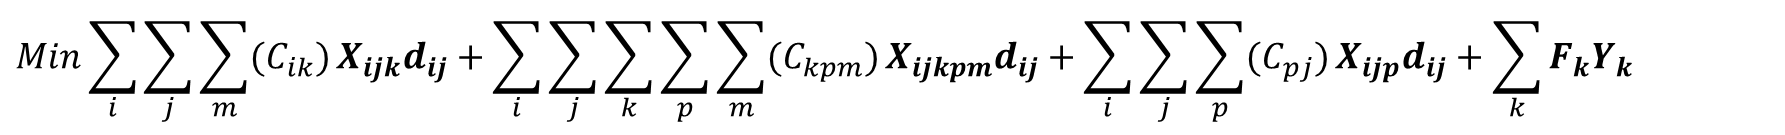

### Definición de las restricciones


Se definen las siguientes restricctiones

### Planteamiento modelo AMPL

In [1]:
# Setting out amplpy library
from amplpy import AMPL, tools
ampl = tools.ampl_notebook(
    modules=["coin", "highs", "gokestrel"], # modules to install
    license_uuid="dd2ebe38-2a32-444c-9502-e6ad048779b0", # license to use
    g=globals()) # instantiate AMPL object and register magics

Licensed to AMPL Community Edition License for <santiagotorreglosadiaz@gmail.com>.


In [ ]:
# Creating the model
ampl = AMPL()
ampl.eval(r"""
    # Setting groups 
    set Origin;
    set Destination;
    set CTL;
    set PCTL;
    set Train_E;
    set Port;
    set Mode;

    # Setting parameters
    param dij{i in Origin, j in Destination};
    param Fk{k in CTL};
    param Fm{m in PCTL};

    param Cik{i in Origin, k in CTL};
    param Ckf{k in CTL, f in Train_E};
    #param Ckp{k in CTL, p in Port};
    param Cff{f in Train_E};
    param Cfk{f in Train_E, k in CTL};
    param Cmp{m in PCTL, p in Port};
    param Cpj{p in Port, j in Destination};

    
    param Eik{i in Origin, k in CTL};
    param Ekf{k in CTL, f in Train_E};
    #param Ekp{k in CTL, p in Port};
    param Eff{f in Train_E};
    param Efk{f in Train_E, k in CTL};
    param Emp{m in PCTL, p in Port};
    param Epj{p in Port, j in Destination};
    
    param Qk{k in CTL};
    param Qm{m in PCTL};

    # Setting variables
    var Xijk{i in Origin, j in Destination, k in CTL};#Flujo del arco ok
    var Xijmp{i in Origin, j in Destination, m in PCTL, p in Port};
    
    var Xijkf{i in Origin, j in Destination, k in CTL, f in Train_E};
    var Xijkfm{i in Origin, j in Destination, k in CTL, f in Train_E, m in PCTL};
    var Xijkfmp{i in Origin, j in Destination,k in CTL, f in Train_E, m in PCTL, p in Port};
    var Yk{k in CTL} binary;  # = 1 if CTL built at k
    var Ym{m in PCTL} binary;  # = 1 if CTL built at m

    # Setting Objective Function
    
    minimize total_cost:
        sum {k in CTL} Yk[k]*Fk[k] + sum {m in PCTL} Ym[m]*Fm[m]
        + sum {i in Origin, j in Destination, k in CTL} Xijk[i,j,k]*(Cik[i,k]+Eik[i,k])
        + sum {i in Origin, j in Destination, m in PCTL, p in Port} Xijmp[i,j,k,p]*(Cmp[k,p]+Emp[k,p])
        + sum {i in Origin, j in Destination, k in CTL, f in Train_E} Xijkf[i,j,k,f]*(Ckf[k,f]+Ekf[k,f])
        + sum {i in Origin, j in Destination, k in CTL, f in Train_E, m in PCTL} Xijkfm[i,j,k,f]*(Cmp[m,p]+Emp[m,p])
        + sum {i in Origin, j in Destination, k in CTL, f in Train_E, m in PCTL, p in Port} Xijkfmp[i,j,k,f,m]*(Cmp[m,p]+Emp[m,p]);

    # Restrictions
    subject to chosen_CTL:
        sum{k in CTL} Yk[k] = 5;
    subject to a {i in Origin, j in Destination}:
        sum{k in CTL} Xijk[i,j,k] = 1;""")

In [3]:
# Creating the model
ampl = AMPL()
ampl.eval(r"""
    # Setting groups 
    set Origin;#Conjunto de nodos generadores de carga
    set Destination;#Conjunto de nodos atractores de carga
    set CTL;#Conjunto de potenciales terminales de consolidación (hub)
    set PCTL;#Conjunto de potenciales terminales de distribución (hub)
    set Port;#Conjunto de puertos

    # Setting parameters
    param q;#Número de terminales abiertas
    
    param Fk{k in CTL};#Costo fijo de instalación de una terminal de consolidación en una terminal k ∈ K
    param Fm{m in PCTL};#Costo fijo de instalación de una terminal de distribución en una terminal m ∈ M

    param CAPk{k in CTL};#Capacidad de la terminal de consolidación k ∈ K
    param CAPm{m in PCTL};#Capacidad de la terminal de consolidación m ∈ M

    #param T_T{m in PCTL};#Costo de transporte unitario del origen i ∈ I al destino j ∈ J utilizando la alternativa de envío directo
    param Cij{i in Origin, j in Destination};##Costo de transporte unitario del origen i ∈ I al destino j ∈ J utilizando la alternativa de envío directo
    param Cikj{i in Origin, k in CTL, j in Destination};##Costo de transporte unitario del origen i ∈ I al destino j ∈ J utilizando la alternativade envío a través de la terminal k ∈ K
    param Cimj{i in Origin, m in PCTL, j in Destination};##Costo de transporte unitario del origen i ∈ I al destino j ∈ J utilizando la alternativade envío a través de la terminal m ∈ M
    param Cijkm{i in Origin, j in Destination, m in PCTL,  k in CTL};#Costo de transporte unitario del origen i ∈ I al destino j ∈ J utilizando la alternativa de envío a través del par de terminales k ∈ K y m ∈ M

    param Eij{i in Origin, j in Destination};#Costos de externalidades unitario del origen i ∈ I al destino j ∈ J utilizando la alternativa de envío directo
    param Eikj{i in Origin, k in CTL, j in Destination};#Costos de externalidades unitario del origen i ∈ I al destino j ∈ J utilizando la alternativade envío a través de la terminal k ∈ K
    param Eimj{i in Origin, m in PCTL, j in Destination};#Costos de externalidades unitario del origen i ∈ I al destino j ∈ J utilizando la alternativade envío a través de la terminal m ∈ M
    param Eijkm{i in Origin, j in Destination, m in PCTL,  k in CTL};#Costos de externalidades unitario del origen i ∈ I al destino j ∈ J utilizando la alternativa de envío a través del par de terminales k ∈ K y m ∈ M
    
    param Wij{i in Origin, j in Destination};#Demanda de carga a enviar del nodo de origen i ∈ I al destino j ∈ J

    
    # Setting variables
    var Yk{k in CTL} binary;  # = 1 if CTL built at k
    var Ym{m in PCTL} binary;  # = 1 if CTL built at m
    var Ykm{k in CTL, m in PCTL} binary;  # = 1 if Yk*Ym=1
    
    var Pij{i in Origin, j in Destination};#Proporción de flujo de mercancía del producto p ∈ P que se envía directamente del origen i ∈ I al destino j ∈ J.
    var Pikj{i in Origin, k in CTL, j in Destination};#Proporción de flujo de mercancía del producto p ∈ P que se envía del origen i ∈ I al destino j ∈ J a través de la terminal k ∈ K.
    var Pimj{i in Origin, m in PCTL, j in Destination};#Proporción de flujo de mercancía del producto p ∈ P que se envía del origen i ∈ I al destino j ∈ J a través de la terminal m ∈ M.
    var Pijkm{i in Origin, j in Destination, k in CTL, m in PCTL};#Proporción de flujo de mercancía del producto p ∈ P que se envía del origen i ∈ I al destino j ∈ J a través de las terminales k ∈ K y m ∈ M
    
    
    # Setting Objective Function
    
    minimize total_cost:
        sum {k in CTL} Yk[k]*Fk[k] + sum {m in PCTL} Ym[m]*Fm[m]
        + sum {i in Origin, j in Destination} Pij[i,j]*Wij[i,j]*(Cij[i,j]+Eij[i,j])
        + sum {i in Origin, j in Destination, k in CTL} Pikj[i,k,j]**Wij[i,j]*(Cikj[i,k,j]+Eikj[i,k,j])
        + sum {i in Origin, j in Destination, m in PCTL} Pimj[i,m,j]**Wij[i,j]*(Cimj[i,m,j]+Eimj[i,m,j])
        + sum {i in Origin, j in Destination, k in CTL, m in PCTL} Pijkm[i,j,k,m]*Wij[i,j]*(Cijkm[i,j,k,m]+Eijkm[i,j,k,m])

       ;

    # Restrictions
    subject to chosen_CTL:#que q terminales serán seleccionadas
        (sum{k in CTL} Yk[k]) + (sum{m in PCTL} Yk[m]) = q;
        
    subject to capacity {i in Origin, j in Destination}:#garantiza que el flujo de carga entre los nodos i y j es ruteado a través del envío directo o a través de las terminales que se encuentren disponibles
        Pij[i,j] + (sum{k in CTL} Pikj[i,k,j]) + (sum{m in PCTL} Pimj[i,m,j]) 
        + (sum{k in CTL, m in PCTL} Pijkm[i,j,k,m]) = 1;
        
    subject to binary1 {k in CTL, m in PCTL}:#garantizan la resolución del problema de multiplicación de las variables binarias.
        Yk[k] + Ym[m] <= 1 + Ykm[k,m];
        
    subject to binary2 {k in CTL, m in PCTL}:#garantizan la resolución del problema de multiplicación de las variables binarias.
        2*Ykm[k,m] <= Yk[k] + Ym[m];
    
    subject to flow1 {k in CTL}:#garantizan que el flujo de carga que maneja cada terminal es menor o igual a la capacidad instalada
        (sum{i in Origin, j in Destination} Pikj[i,k,j]*Wij[i,j]) + (sum{i in Origin, j in Destination,  m in PCTL} Pijkm[i,j,k,m]*Wij[i,j])  <= CAPk[k]*Yk[k];
    subject to flow2 {m in PCTL}:#garantizan que el flujo de carga que maneja cada terminal es menor o igual a la capacidad instalada
        (sum{i in Origin, j in Destination} Pimj[i,m,j]*Wij[i,j]) + (sum{i in Origin, j in Destination,  k in CTL} Pijkm[i,j,k,m]*Wij[i,j])  <= CAPm[m]*Ym[m];
 
            
        """)

## Modelo final

In [4]:
# Creating the model
ampl = AMPL()
ampl.eval(r"""
    # Setting groups 
    set Origin;#Conjunto de nodos generadores de carga
    set Destination;#Conjunto de nodos atractores de carga
    set CTL;#Conjunto de potenciales terminales de consolidación (hub)
    set PCTL;#Conjunto de potenciales terminales de distribución (hub)
    set Port;#Conjunto de puertos

    # Setting parameters
    param q;#Número de terminales abiertas
    
    param Fk{k in CTL};#Costo fijo de instalación de una terminal de consolidación en una terminal k ∈ K
    param Fm{m in PCTL};#Costo fijo de instalación de una terminal de distribución en una terminal m ∈ M

    param CAPk{k in CTL};#Capacidad de la terminal de consolidación k ∈ K
    param CAPm{m in PCTL};#Capacidad de la terminal de consolidación m ∈ M

    #param T_T{m in PCTL};#Costo de transporte unitario del origen i ∈ I al destino j ∈ J utilizando la alternativa de envío directo
    param Cijp{i in Origin, j in Destination, p in PCTL};##Costo de transporte unitario del origen i ∈ I al destino j ∈ J utilizando la alternativa de envío directo carretero al puerto p
    param Cijkp{i in Origin, j in Destination, k in CTL, p in Port};##Costo de transporte unitario del origen i ∈ I al destino j ∈ J utilizando la alternativade envío a través de la terminal k ∈ K al puerto p
    param Cijmp{i in Origin, j in Destination, m in PCTL, p in Port};##Costo de transporte unitario del origen i ∈ I al destino j ∈ J utilizando la alternativade envío a través de la terminal m ∈ M al puerto p    
    param Cijkmp{i in Origin, j in Destination,  k in CTL, m in PCTL, p in Port};#Costo de transporte unitario del origen i ∈ I al destino j ∈ J utilizando la alternativa de envío a través del par de terminales k ∈ K y m ∈ M al puerto p

    param Eijp{i in Origin, j in Destination, p in PCTL};##Costo de externalidad unitario del origen i ∈ I al destino j ∈ J utilizando la alternativa de envío directo carretero al puerto p
    param Eijkp{i in Origin, j in Destination, k in CTL, p in Port};##Costo de externalidad unitario del origen i ∈ I al destino j ∈ J utilizando la alternativade envío a través de la terminal k ∈ K al puerto p
    param Eijmp{i in Origin, j in Destination, m in PCTL, p in Port};##Costo de externalidad unitario del origen i ∈ I al destino j ∈ J utilizando la alternativade envío a través de la terminal m ∈ M al puerto p    
    param Eijkmp{i in Origin, j in Destination,  k in CTL, m in PCTL, p in Port};#Costo de externalidad unitario del origen i ∈ I al destino j ∈ J utilizando la alternativa de envío a través del par de terminales k ∈ K y m ∈ M al puerto p
    
    param Wij{i in Origin, j in Destination};#Demanda de carga a enviar del nodo de origen i ∈ I al destino j ∈ J

    
    # Setting variables
    var Yk{k in CTL} binary;  # = 1 if CTL built at k
    var Ym{m in PCTL} binary;  # = 1 if CTL built at m
    var Ykm{k in CTL, m in PCTL} binary;  # = 1 if Yk*Ym=1
    
    var Pijp{i in Origin, j in Destination, p in PCTL};#Proporción de flujo de mercancía que se envía directamente del origen i ∈ I al destino j ∈ J por el puerto p
    var Pijkp{i in Origin, j in Destination, k in CTL, p in Port};#Proporción de flujo que se envía del origen i ∈ I al destino j ∈ J a través de la terminal k ∈ K al puerto p
    var Pijmp{i in Origin, j in Destination, m in PCTL, p in Port};#Proporción de flujo que se envía del origen i ∈ I al destino j ∈ J a través de la terminal m ∈ M al puerto p
    var Pijkmp{i in Origin, j in Destination,  k in CTL, m in PCTL, p in Port};#Proporción de flujo que se envía del origen i ∈ I al destino j ∈ J a través de las terminales k ∈ K y m ∈ M al puerto p
    
    
    # Setting Objective Function
    
    minimize total_cost:
        sum {k in CTL} Yk[k]*Fk[k] + sum {m in PCTL} Ym[m]*Fm[m]
        + sum {i in Origin, j in Destination, p in PCTL} Pijp[i,j,p]*Wij[i,j]*(Cijp[i,j,p]+Eijp[i,j,p])
        + sum {i in Origin, j in Destination, k in PCTL, p in Port} Pijkp[i,j,k,p]*Wij[i,j]*(Cijkp[i,j,k,p]+Cijkp[i,j,k,p])
        + sum {i in Origin, j in Destination, m in CTL, p in Port} Pijmp[i,j,m,p]*Wij[i,j]*(Cijmp[i,j,m,p]+Cijmp[i,j,m,p])
        + sum {i in Origin, j in Destination, k in CTL, m in PCTL, p in Port} Pijkmp[i,j,k,m,p]*Wij[i,j]*(Cijkmp[i,j,k,m,p]+Eijkmp[i,j,k,m,p])

       ;

    # Restrictions
    subject to chosen_CTL:#que q terminales serán seleccionadas
        (sum{k in CTL} Yk[k]) + (sum{m in PCTL} Yk[m]) = q;
        
    subject to capacity {i in Origin, j in Destination}:#garantiza que el flujo de carga entre los nodos i y j es ruteado a través del envío directo o a través de las terminales que se encuentren disponibles
        (sum{p in Port} Pijp[i,j,p]) + (sum{k in CTL,p in Port} Pijkp[i,j,k,p]) + (sum{m in PCTL,p in Port} Pijkp[i,j,m,p]) 
        + (sum{k in CTL, m in PCTL, p in Port} Pijkmp[i,j,k,m,p]) = 1;
        
    subject to binary1 {k in CTL, m in PCTL}:#garantizan la resolución del problema de multiplicación de las variables binarias.
        Yk[k] + Ym[m] <= 1 + Ykm[k,m];
        
    subject to binary2 {k in CTL, m in PCTL}:#garantizan la resolución del problema de multiplicación de las variables binarias.
        2*Ykm[k,m] <= Yk[k] + Ym[m];
    
    subject to flow1 {k in CTL}:#garantizan que el flujo de carga que maneja cada terminal es menor o igual a la capacidad instalada
        (sum{i in Origin, j in Destination,p in Port} Pijkp[i,j,k,p]*Wij[i,j]) + (sum{i in Origin, j in Destination,  m in PCTL, p in Port} Pijkmp[i,j,k,m,p]*Wij[i,j])  <= CAPk[k]*Yk[k];
    subject to flow2 {m in PCTL}:#garantizan que el flujo de carga que maneja cada terminal es menor o igual a la capacidad instalada
        (sum{i in Origin, j in Destination,p in Port} Pijmp[i,j,m,p]*Wij[i,j]) + (sum{i in Origin, j in Destination,  k in CTL, p in Port} Pijkmp[i,j,k,m,p]*Wij[i,j])  <= CAPm[m]*Ym[m];
 
            
        """)